In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
loan_dataset = pd.read_csv("loan.csv")

In [5]:
loan_dataset.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
loan_dataset.shape

(39717, 111)

#Checking for null values for each column
loan_dataset.isnull().sum()

## Removing redundant or null value columns


In [11]:
loan_dataset.dropna(axis = 1, how = 'all', inplace = True)
loan_dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


## Analysing Columns with most null values as Extra Columns

In [12]:
extra_cols = ['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt']

### Cleaning these columns as these are not usefull for our analysis

In [18]:
loan_dataset.drop(extra_cols, axis = 1, inplace = True)
loan_dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


### We have cleaned all the redudant data. 

In [19]:
loan_dataset.shape

(39717, 48)

### Now we have 48 Columns corresponding to loan 
#### 1. We will analyze the user details and  factors that drive loan defaulters before approving loan. Then we can remove the columns
#### 2. We will also remove unique value columns as well as, they don't contribute to the loan defaulters due to irrelevant information. 
#### 3.  At the same time we will remove columns like "desc", "out_prncp_inv" , "total_pymnt_inv " as it has nothing to do with loan ####      defaulting

In [23]:
unique_cols = ["id", "title","member_id", "url",  "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee","mths_since_last_delinq", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "chargeoff_within_12_mths", "delinq_2yrs", "mths_since_last_record"]

loan_dataset.drop(unique_cols, axis = 1, inplace = True)

In [24]:
loan_dataset.shape

(39717, 21)

## We are trying to analyse who is likely to become a defaulter. For this only Fully Paid and charged off data is enough. We can exclude current loan status

In [25]:
loan_dataset = loan_dataset[loan_dataset.loan_status != "Current"]
loan_dataset.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

### Checking for null or missing values

In [26]:
(loan_dataset.isna().sum()/len(loan_dataset.index))*100

loan_amnt              0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_util             0.129611
total_acc              0.000000
dtype: float64

### Here we see  "emp_length", "revol_util" have missing values and both are of type "object". So we will use mode and assign it for missing values 

In [27]:
loan_dataset.emp_length.fillna(loan_dataset.emp_length.mode()[0], inplace = True)


#### Lets check if there is any missing value still present for emp_length

In [28]:
loan_dataset.emp_length.isna().sum()

0

#### We have a clean data for emp_length now. Lets do similar for revol_util
#### We need to standardize the data for revol_util as it is object but has float values. We will remove rows will null data and then standardise revol_util 

In [29]:
loan_dataset.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
loan_dataset.revol_util.isna().sum()

0

In [30]:
loan_dataset.revol_util = pd.to_numeric(loan_dataset.revol_util.apply(lambda x : x.split('%')[0]))

#### Similarly for "int_rate" column.

In [31]:
loan_dataset.int_rate = pd.to_numeric(loan_dataset.int_rate.apply(lambda x : x.split('%')[0]))

#### Converting emp_lenght to numeric as it will be easy for our analysis. Setting < 1 year to 0 and 10+ years to 10

In [33]:
loan_dataset.emp_length = pd.to_numeric(loan_dataset.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [34]:
loan_dataset.head(2)

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9
1,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4


### Annual income is of the major factors for loan approval and hence we need a proper and clean data for this. We will analyze the data and check for any outliers

<Axes: >

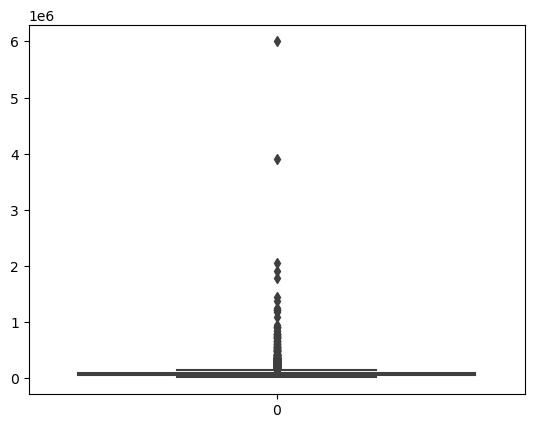

In [35]:
sns.boxplot(loan_dataset['annual_inc'])

#### As we see there are outliers and we need to remove them. After 95 percentile we see they are disconnected and we will remove outliers from 0.95 percentile

In [36]:
annual_inc_quantile_info = loan_dataset.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
annual_inc_quantile_info

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

In [37]:
annual_inc_per_95 = loan_dataset['annual_inc'].quantile(0.95)
loan_dataset = loan_dataset[loan_dataset.annual_inc <= annual_inc_per_95]

<Axes: >

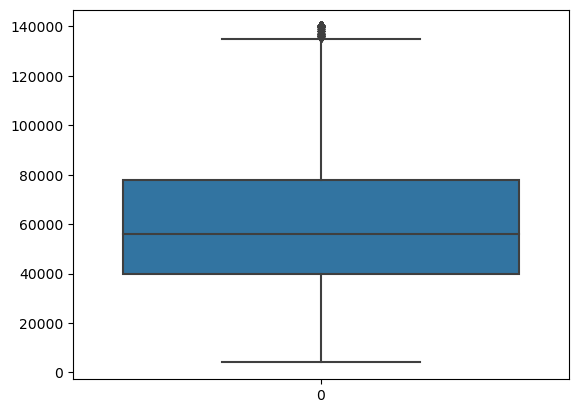

In [38]:
sns.boxplot(loan_dataset.annual_inc)

#### Now we see there are no outliers for this columns. Lets do similar for other numeric cols

In [41]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36606 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            36606 non-null  int64  
 1   funded_amnt_inv      36606 non-null  float64
 2   term                 36606 non-null  object 
 3   int_rate             36606 non-null  float64
 4   installment          36606 non-null  float64
 5   grade                36606 non-null  object 
 6   sub_grade            36606 non-null  object 
 7   emp_length           36606 non-null  int64  
 8   home_ownership       36606 non-null  object 
 9   annual_inc           36606 non-null  float64
 10  verification_status  36606 non-null  object 
 11  issue_d              36606 non-null  object 
 12  loan_status          36606 non-null  object 
 13  purpose              36606 non-null  object 
 14  dti                  36606 non-null  float64
 15  earliest_cr_line     36606 non-null  obje

In [42]:
num_col = ["dti", "loan_amnt", "funded_amnt_inv", "int_rate", "installment", "revol_util"]

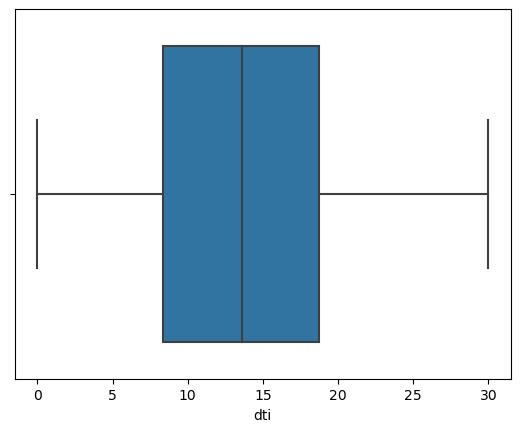

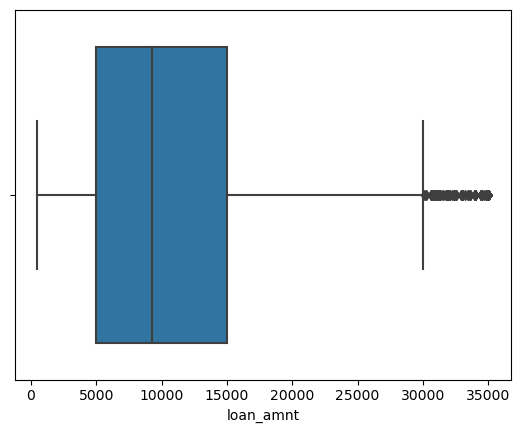

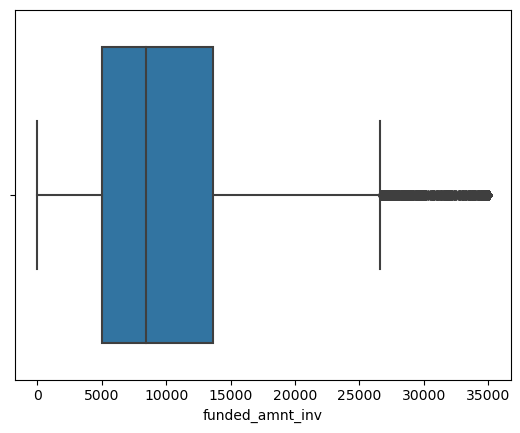

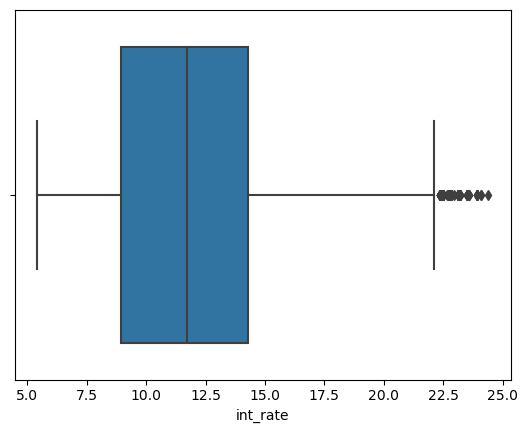

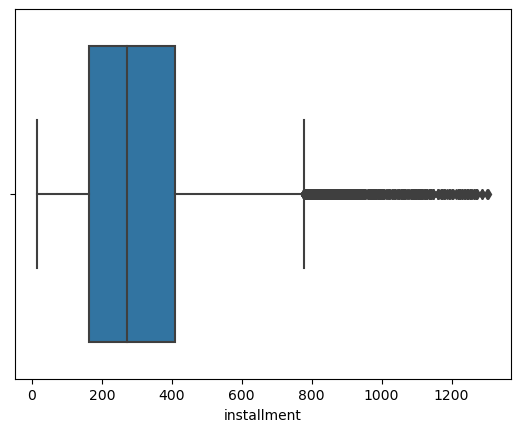

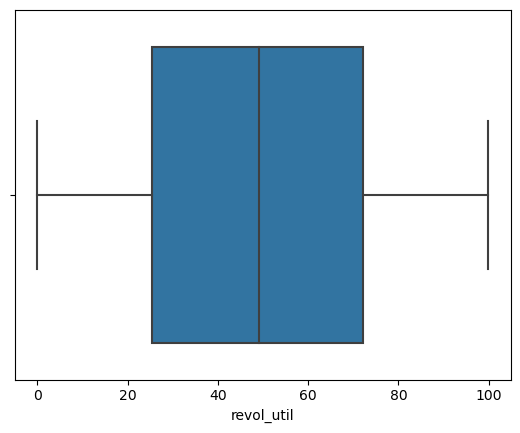

In [45]:
for col in num_col:
    sns.boxplot(x=loan_dataset[col])
    plt.show()

#### We see outliers for loan_amount, funded_amnt_inv, int_rate and installment. But still the data is pretty continuous. Lets not remove it and keep as is

## Categorical Data

<Axes: xlabel='loan_status', ylabel='count'>

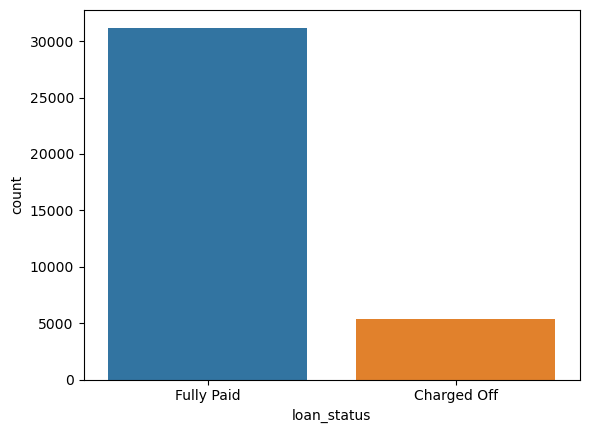

In [48]:
sns.countplot(x = 'loan_status', data = loan_dataset)

#### Converting subgrade to numerical


In [49]:
loan_dataset.sub_grade = pd.to_numeric(loan_dataset.sub_grade.apply(lambda x : x[-1]))
loan_dataset.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

<Axes: xlabel='grade', ylabel='count'>

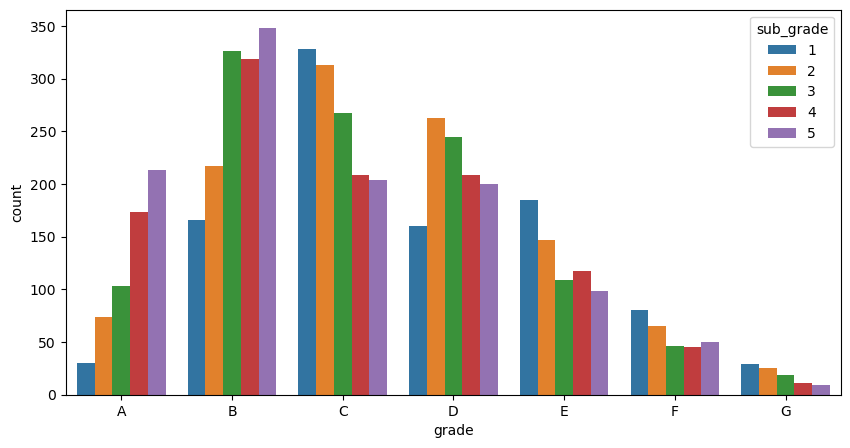

In [51]:
plt.subplots(figsize=(10,5))
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan_dataset[loan_dataset.loan_status == 'Charged Off'])

<Axes: xlabel='grade', ylabel='count'>

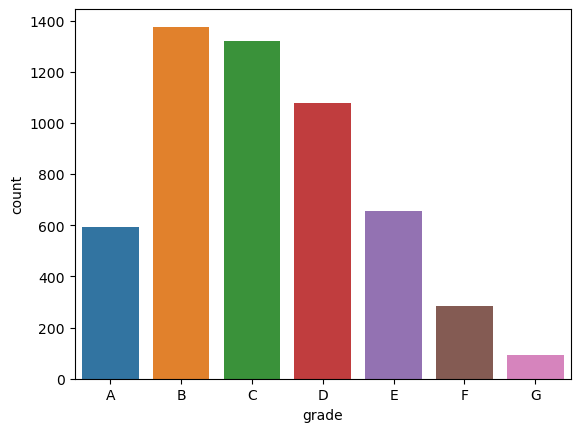

In [52]:
sns.countplot(x = 'grade', data = loan_dataset[loan_dataset.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

In [54]:
### Removing redundant data from categorical columns
loan_dataset['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

<Axes: xlabel='home_ownership', ylabel='count'>

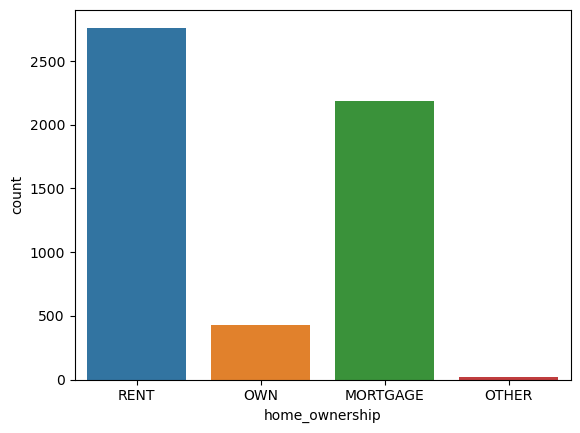

In [127]:
sns.countplot(x='home_ownership', data=loan_dataset[loan_dataset['loan_status']=='Charged Off'])

<Axes: xlabel='count', ylabel='purpose'>

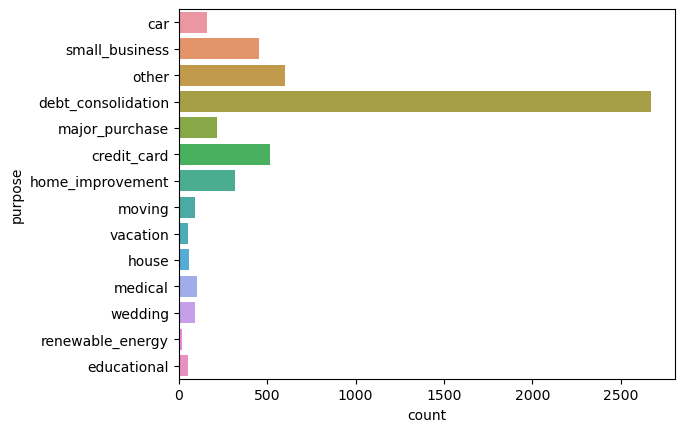

In [56]:
sns.countplot(y ='purpose', data=loan_dataset[loan_dataset.loan_status == 'Charged Off'])


In [60]:
### Grouping categorical data for colmns
loan_dataset['int_rate_groups'] = pd.cut(loan_dataset['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan_dataset['open_acc_groups'] = pd.cut(loan_dataset['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
loan_dataset['revol_util_groups'] = pd.cut(loan_dataset['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
loan_dataset['total_acc_groups'] = pd.cut(loan_dataset['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
loan_dataset['annual_inc_groups'] = pd.cut(loan_dataset['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])
loan_dataset.head(2)

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups
0,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,24000.0,...,1,3,0,83.7,9,9%-13%,2-10,80-100,2-20,3k-31k
1,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,30000.0,...,5,3,0,9.4,4,13%-17%,2-10,0-20,2-20,3k-31k


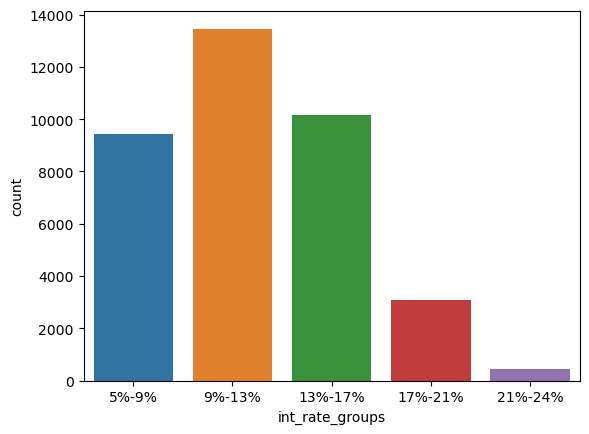

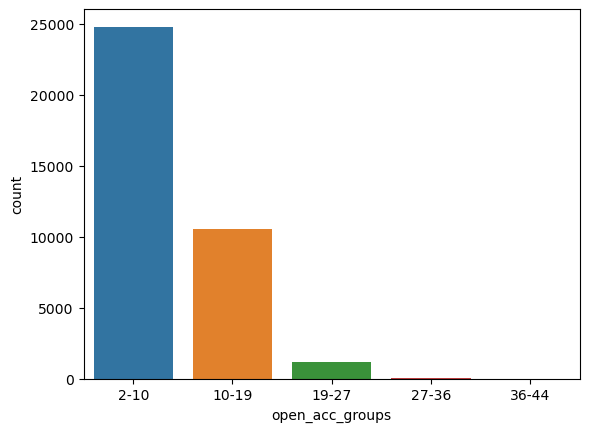

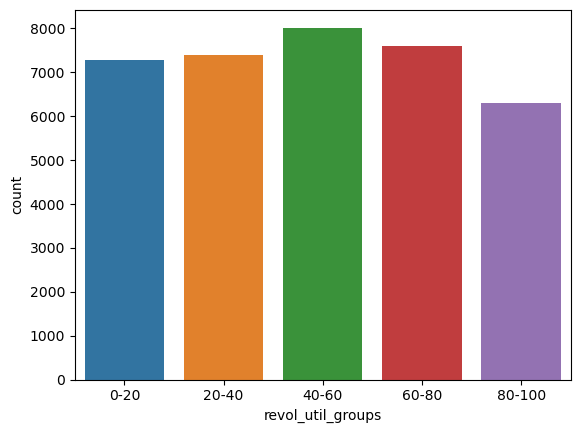

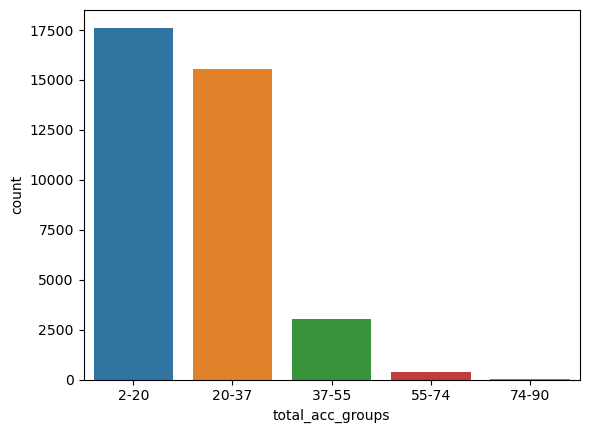

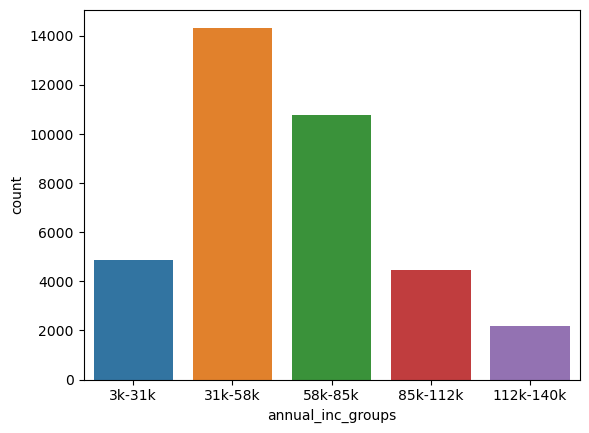

In [61]:
### Analysing these groups
group_col = ["int_rate_groups", "open_acc_groups", "revol_util_groups", "total_acc_groups", "annual_inc_groups"]
for col in group_col:
    sns.countplot(x=loan_dataset[col])
    plt.show()


In [66]:
### Analysis loan fator columns
loan_col = ["term", "installment", "verification_status", "inq_last_6mths", "pub_rec"]

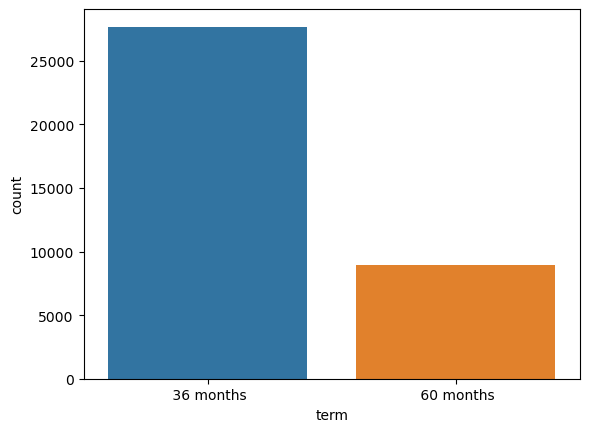

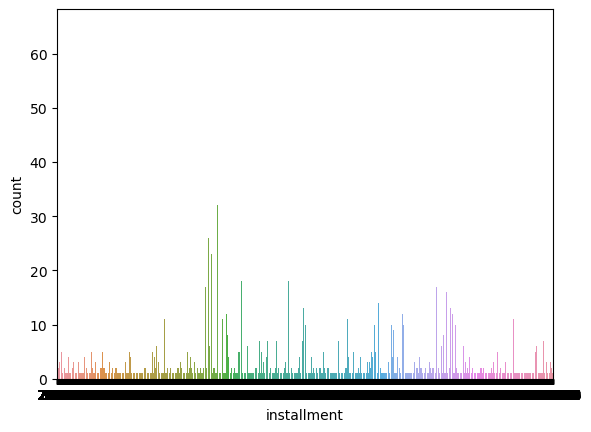

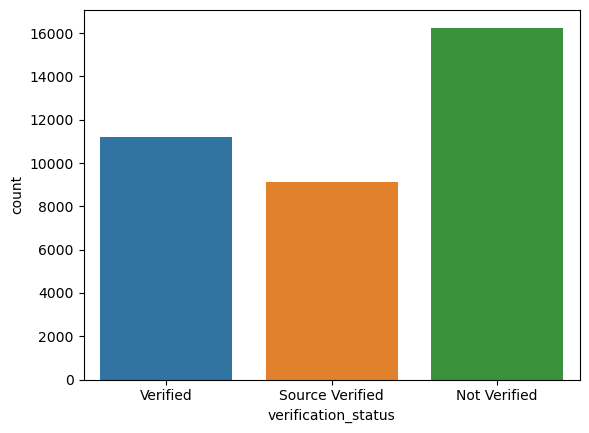

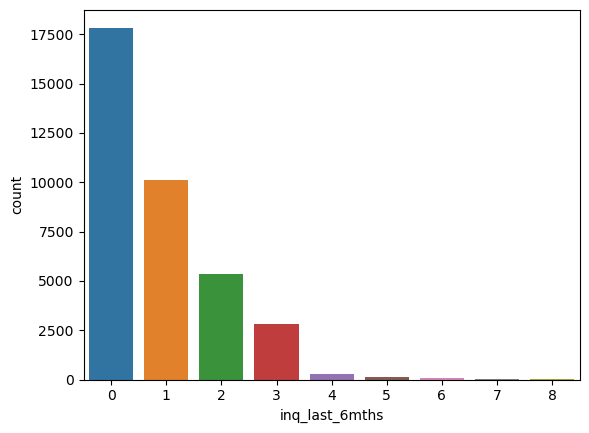

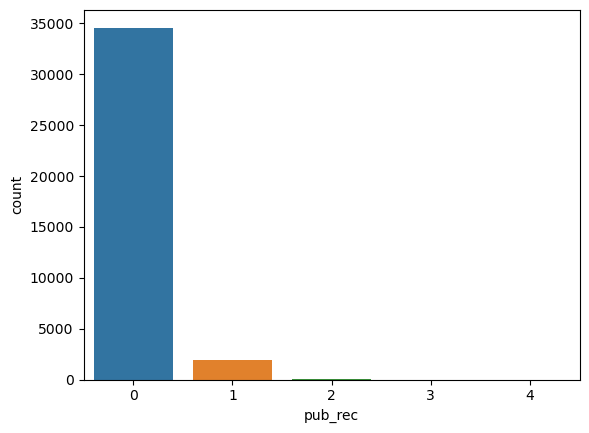

In [67]:
for col in loan_col:
    sns.countplot(x=loan_dataset[col])
    plt.show()

In [70]:
### Analyzing by loan issued month and year
loan_df_month_year = loan_dataset['issue_d'].str.partition("-", True)     
loan_dataset['issue_month']=loan_df_month_year[0]                       
loan_dataset['issue_year']='20' + loan_df_month_year[2]
loan_dataset.head(2)

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,pub_rec,revol_util,total_acc,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups,issue_month,issue_year
0,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,24000.0,...,0,83.7,9,9%-13%,2-10,80-100,2-20,3k-31k,Dec,2011
1,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,30000.0,...,0,9.4,4,13%-17%,2-10,0-20,2-20,3k-31k,Dec,2011


In [71]:
date_col = ['issue_month','issue_year' ]

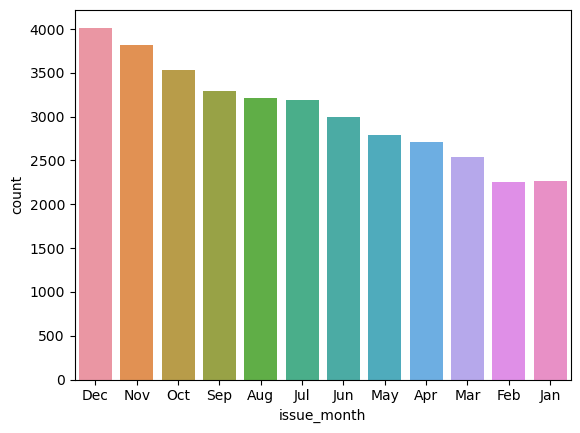

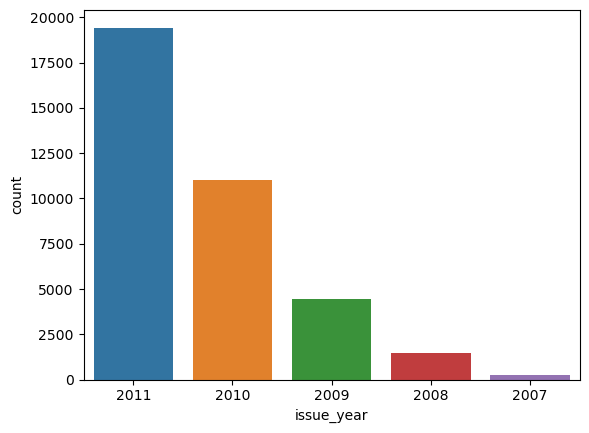

In [72]:
for col in date_col:
    sns.countplot(x=loan_dataset[col])
    plt.show()

### Here we can see that maximum number of defaulters occured when the loan was sanctioned/issued in the month of december and issued in year 2011. 

### Grouping loan amount factors 

In [73]:
loan_dataset['installment_group'] = pd.cut(loan_dataset['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
loan_dataset['funded_amnt_inv_group'] = pd.cut(loan_dataset['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
loan_dataset['loan_amnt_group'] = pd.cut(loan_dataset['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan_dataset['dti_group'] = pd.cut(loan_dataset['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

In [74]:
loan_amount_col = ['installment_group', 'funded_amnt_inv_group','loan_amnt_group','dti_group']

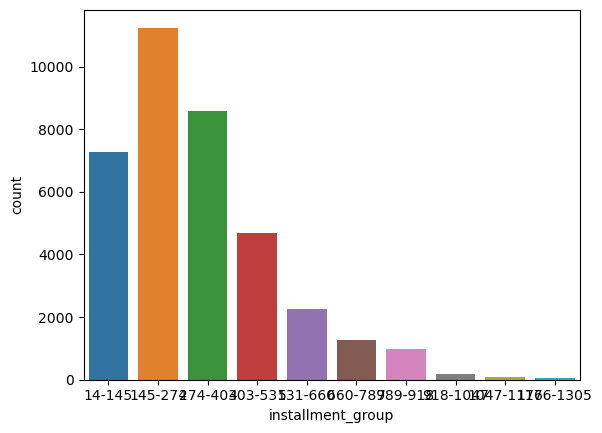

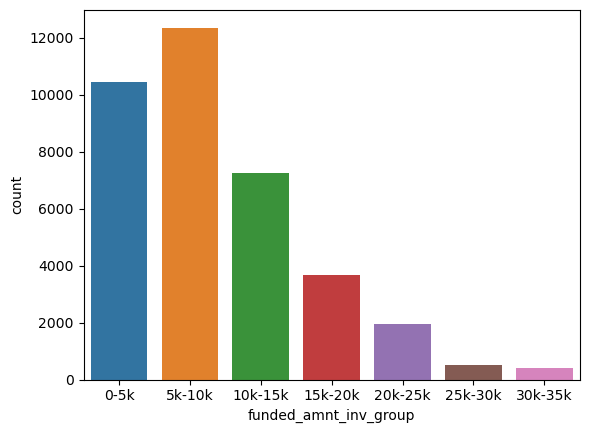

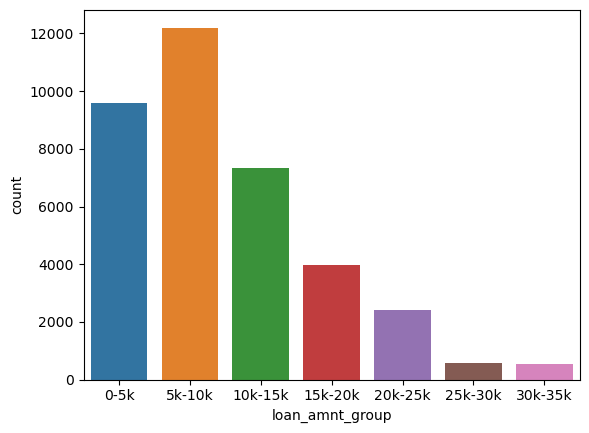

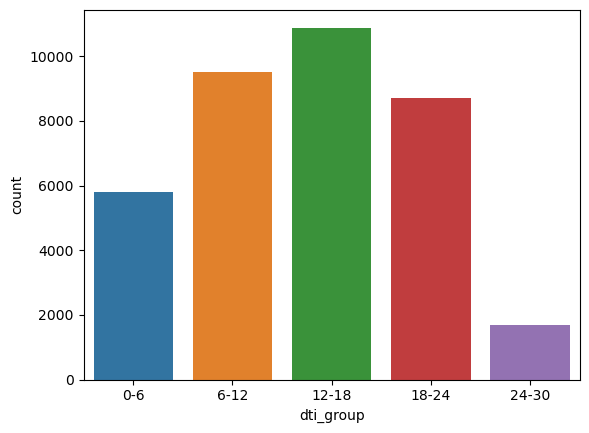

In [75]:
for col in loan_amount_col:
    sns.countplot(x=loan_dataset[col])
    plt.show()

### Here we can analyze the data and we can observe that

- Applicants who receive interest at the rate of 13-17%
- Applicants having house_ownership as 'RENT'
- Applicants who have 20-37 open_acc
- Applicants with employement length of 10
- Applicants who use the loan to clear other debts
- Applicants who have an income of range 31201 - 58402
- When funded amount by investor is between 5000-10000
- Loan amount is between 5429 - 10357
- When the number of derogatory public records is 0
- When monthly installments are between 145-274
- Term of 36 months
- When the loan status is Not verified
- Grade is 'B'
- When the no of enquiries in last 6 months is 0
- When the purpose is 'debt_consolidation'
- Dti is between 12-18
- total grade of 'B5' level.

## Analysing annual income

#### Annual income vs int_rate

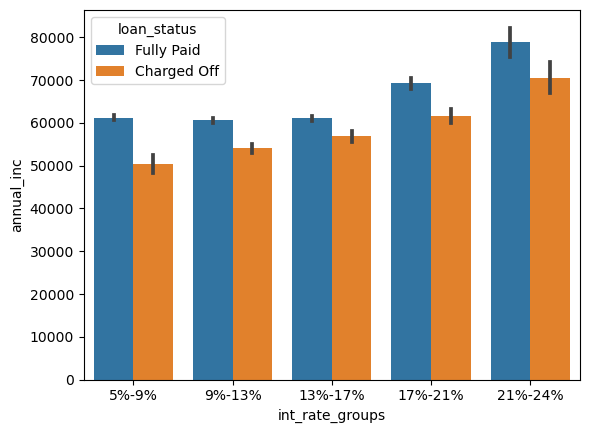

In [77]:
sns.barplot(data =loan_dataset,x='int_rate_groups', y='annual_inc', hue ='loan_status')
plt.show()

#### Annual loan and loan_amount


<Axes: xlabel='annual_inc_groups', ylabel='loan_amnt'>

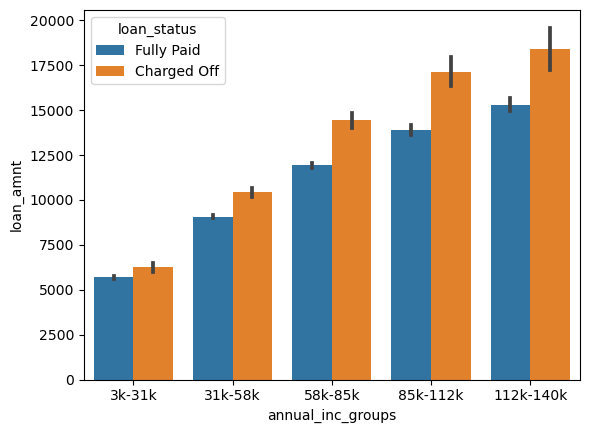

In [78]:
sns.barplot(x = "annual_inc_groups", y = "loan_amnt", hue = 'loan_status', data = loan_dataset)

#### Annaul income and puporse of loan


<Axes: xlabel='annual_inc', ylabel='purpose'>

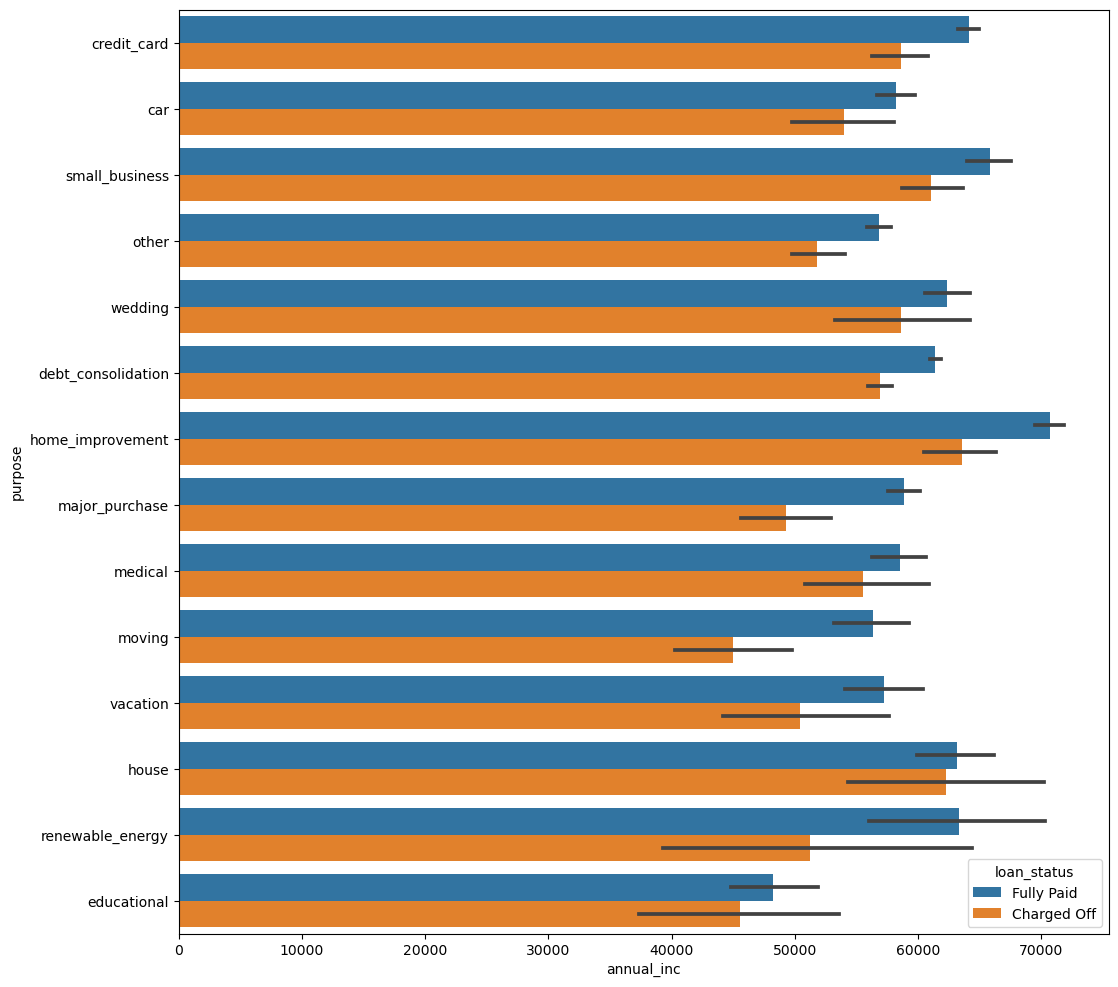

In [82]:
plt.figure(figsize=(12,12))
sns.barplot(data =loan_dataset,x='annual_inc', y='purpose', hue ='loan_status')


#### Annaul income and home owner

<Axes: xlabel='home_ownership', ylabel='annual_inc'>

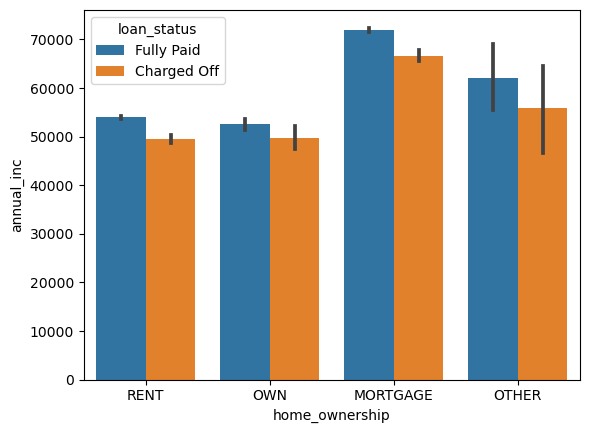

In [83]:
sns.barplot(data =loan_dataset,x='home_ownership', y='annual_inc', hue ='loan_status')


### Analysing Loan Amount

#### Loan amount vs date columns

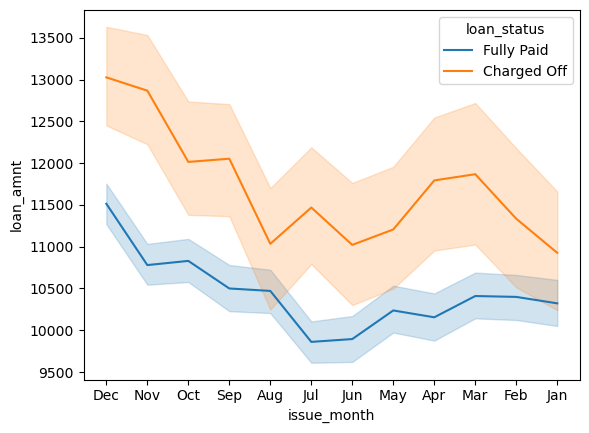

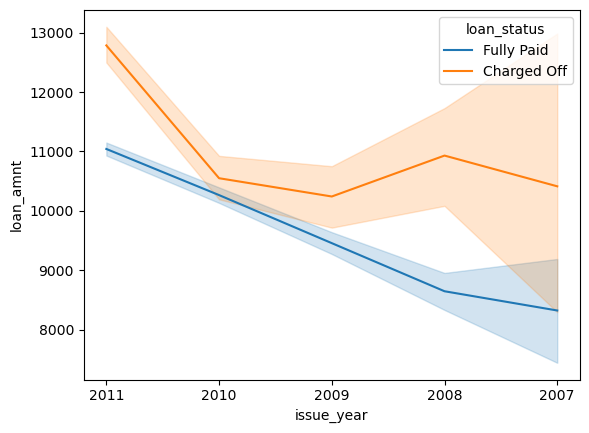

In [101]:
for col in date_col:
    sns.lineplot(data =loan_dataset,y='loan_amnt', x=loan_dataset[col], hue ='loan_status')
    plt.show()


In [103]:
#### Loan Amount vs loan factor columns


#### Loan Amount vs loan factor columns
fact_col = ['purpose', 'home_ownership', 'grade','emp_length', 'verification_status']


#### So, here we can see this all different aspect to consider Target Variable is Loan Status And top 5 major variables to consider for loan prediction: Purpose of Loan, Employment Length, Grade, etc

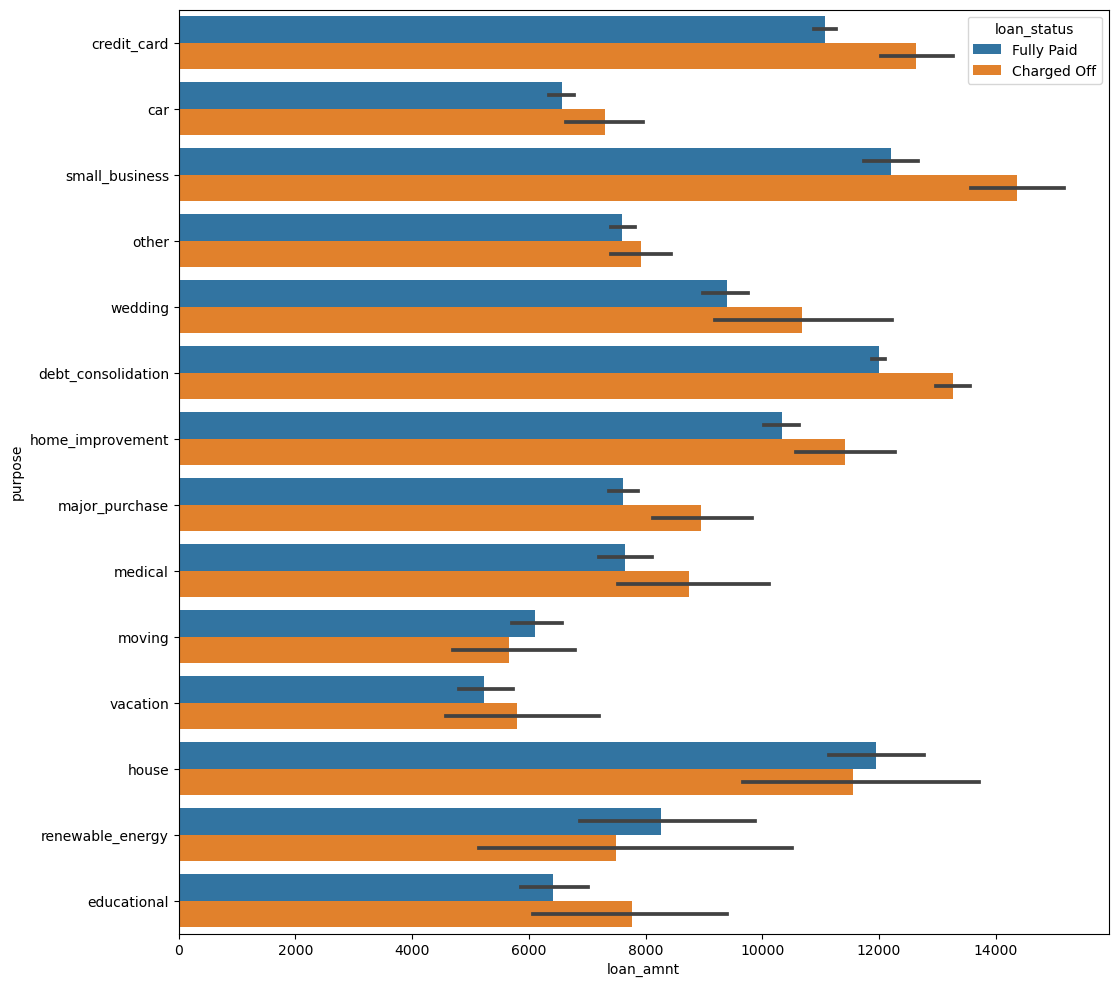

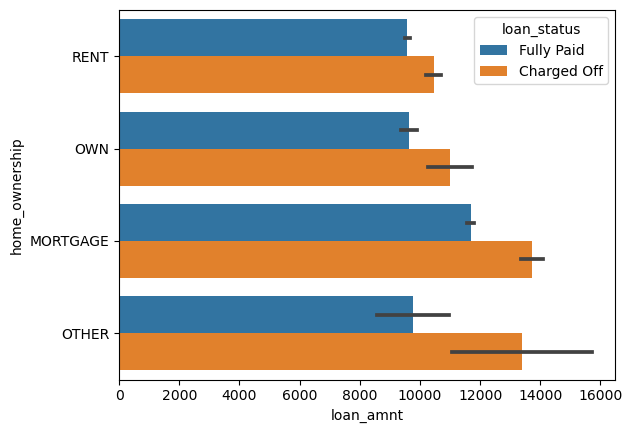

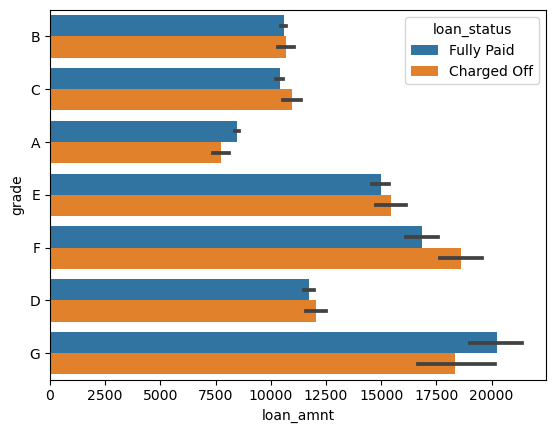

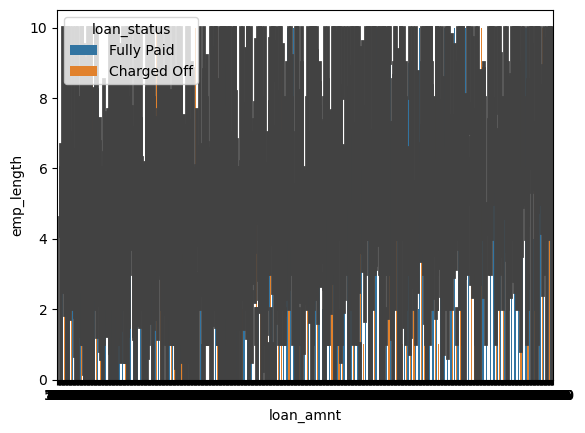

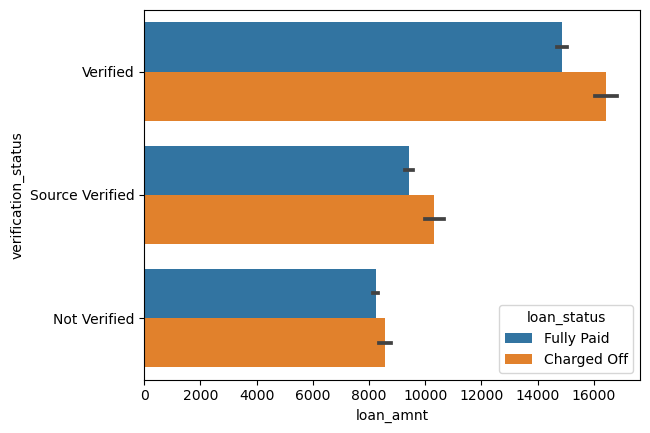

In [122]:
plt.figure(figsize=(12,12))
for col in fact_col:
    sns.barplot(data =loan_dataset,x='loan_amnt', y=loan_dataset[col], hue ='loan_status')
    plt.show()

#### Loan Amount vs loan amount grouping

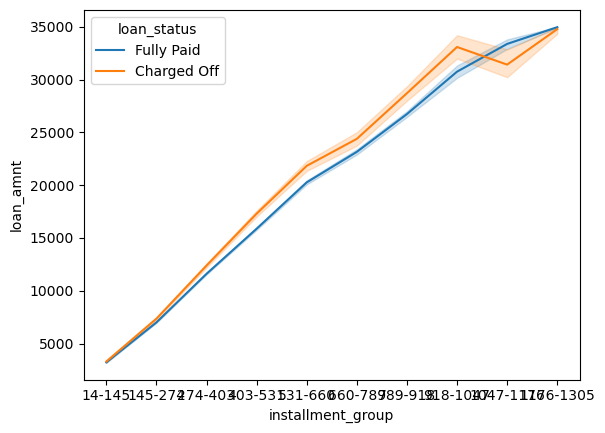

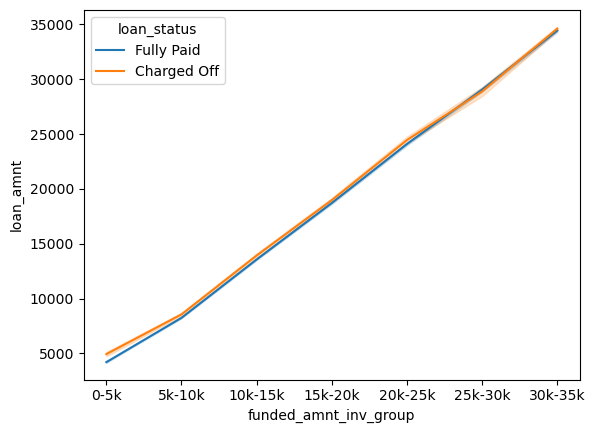

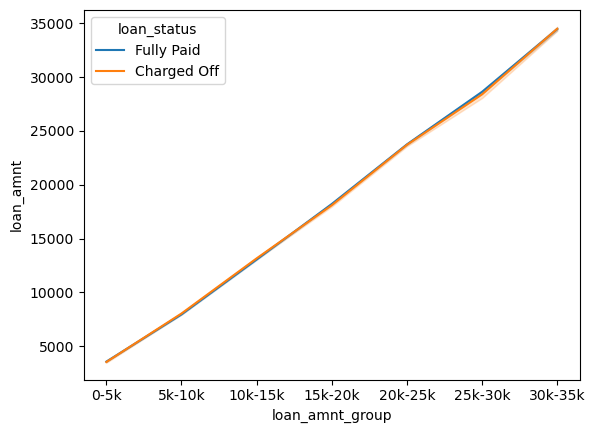

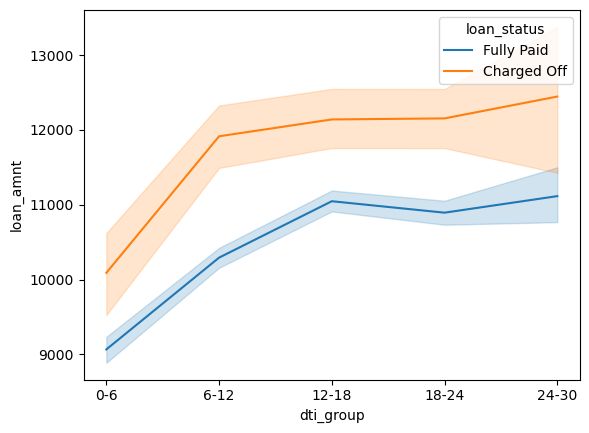

In [108]:

for col in loan_amount_col:
    sns.lineplot(data =loan_dataset,y='loan_amnt', x=loan_dataset[col], hue ='loan_status')
    plt.show()

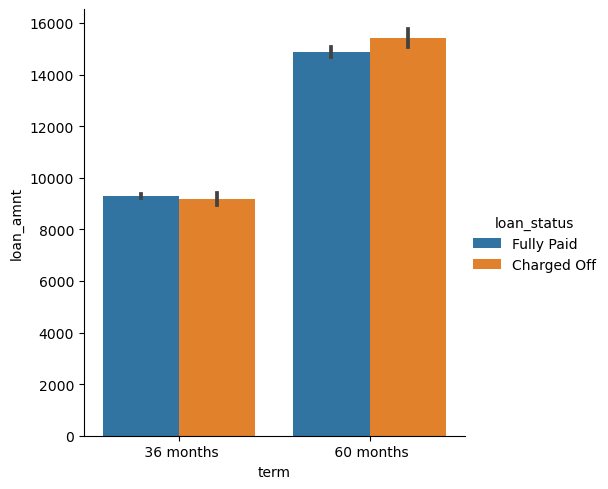

In [106]:
sns.catplot(x = 'term', y = 'loan_amnt', data = loan_dataset,hue = 'loan_status', kind = 'bar')

#### Here we can observe applicants who applied and defaulted have no significant difference in loan_amounts. Loan amount is not a factor to be considered for loan defaults

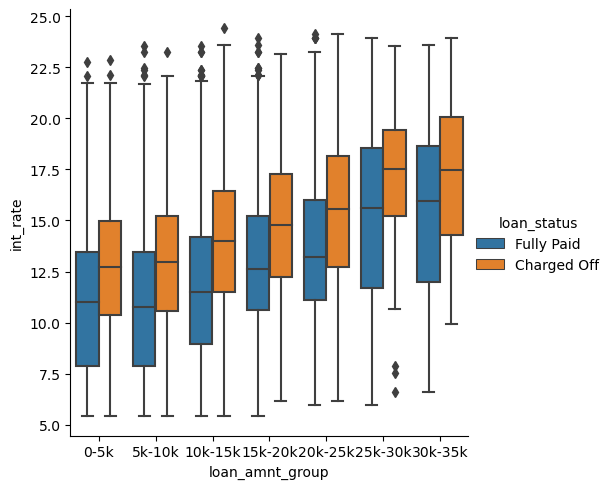

In [129]:
sns.catplot(data =loan_dataset,y ='int_rate', x ='loan_amnt_group', hue ='loan_status',kind = 'box')

#### From Graph above we can see that for loan amount group the interest rate for charged off loans are higher than that of fully paid loans 

# Observations

### From the above analysis e probability of  loan defaulting is when : 

- When the loan is verified and loan amount is above 16k and loan is not verified for loan amount below 8.5k
- Applicants taking loan for 'home improvement' and have income of 60k -70k and home ownership is 'MORTGAGE
- Applicants who receive interest at the rate of 21-24% and have an income of 70k-80k and who receive interest at the rate of     5-9% and have an income of 50k-60k
- For grade G and interest rate above 20%
- When employment length is 10yrs and loan amount is 12k-14k 
- Applicants who have taken a loan in the range 30k - 35k and are charged interest rate of 15-17.5 %
- Applicants who have taken a loan for small business and the loan amount is greater than 14k
- Applicants whose home ownership is 'MORTGAGE and have loan of 14-16k
- When grade is F and loan amount is between 15k-20k
- When home ownership is Rent, more than 2500 applicants are charged off
- Applicants with debt consolidation are loan defaulters
- 12k - 14k applicants have received interest rate of 9-13%
- Maximum number of defaulters occured when the loan was sanctioned/issued in the month of december and issued in year 2011
